In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [2]:
df = pd.read_csv('Admission_Predict.csv')
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [3]:
df.columns = df.columns.str.strip()



In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [5]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [6]:
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
df.shape

(400, 9)

In [9]:

df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [10]:
skew_col=df.skew()
skew_col

Serial No.           0.000000
GRE Score           -0.062893
TOEFL Score          0.057216
University Rating    0.171260
SOP                 -0.275761
LOR                 -0.106991
CGPA                -0.065991
Research            -0.191582
Chance of Admit     -0.353448
dtype: float64

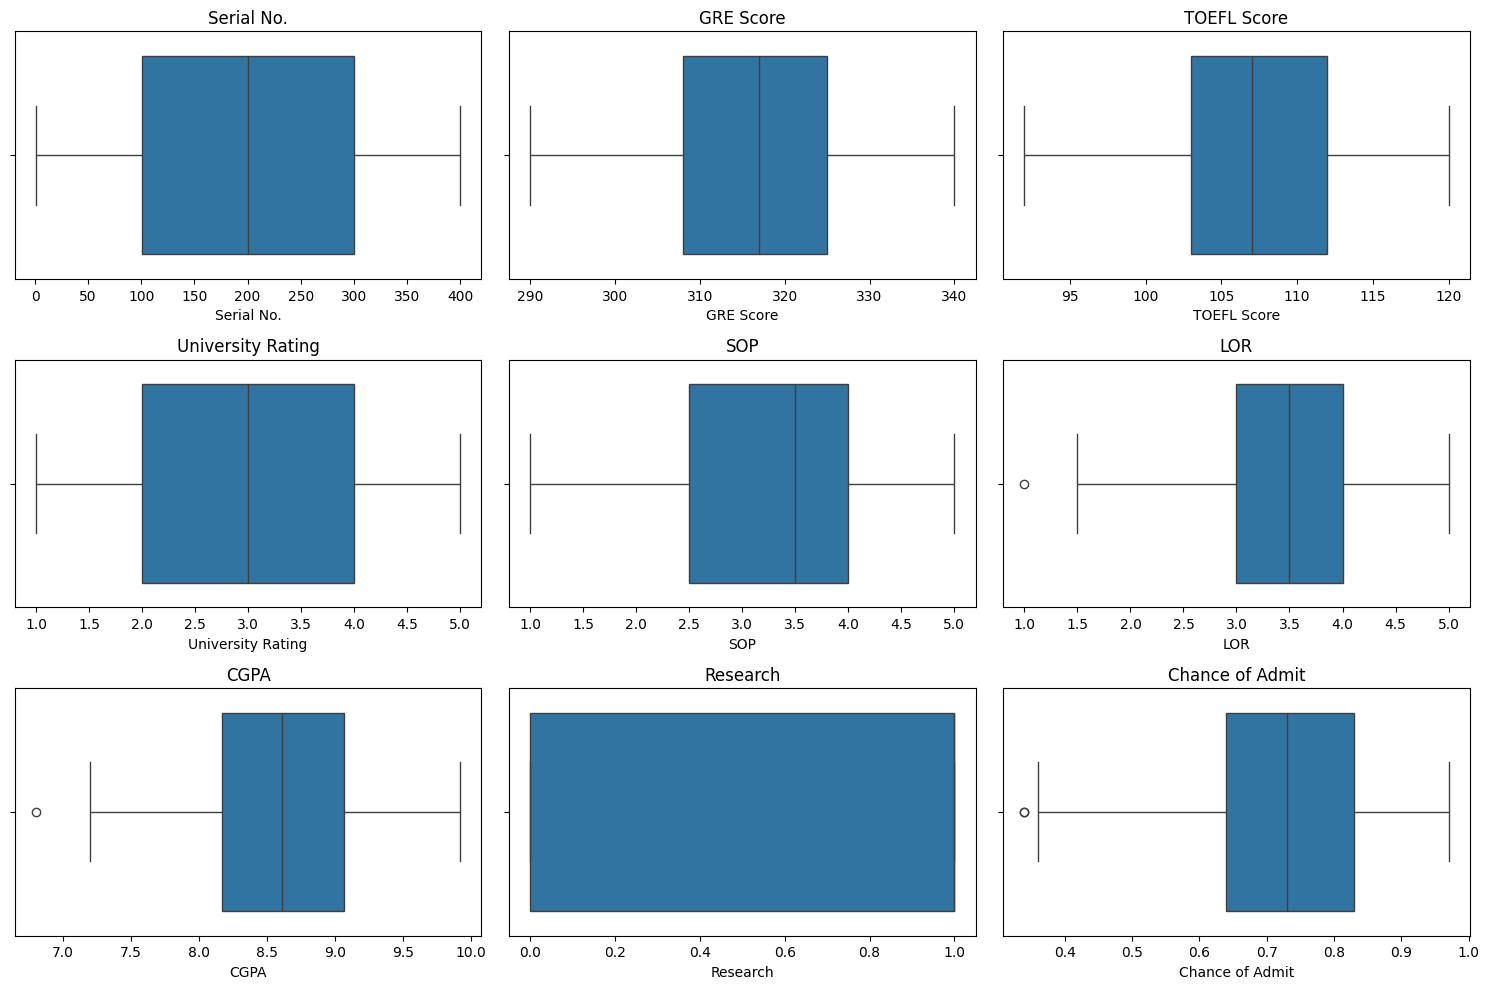

In [11]:
# Create box plots for each numerical column to check for outliers
numerical_cols = df.select_dtypes(include=np.number).columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(x=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [12]:

numerical_cols = df.select_dtypes(include=np.number).columns

outliers = {}
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    col_outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)].shape[0]
    outliers[col] = col_outliers

print("Number of outliers in each numerical column (IQR method):")
for col, count in outliers.items():
    print(f"{col}: {count}")

Number of outliers in each numerical column (IQR method):
Serial No.: 0
GRE Score: 0
TOEFL Score: 0
University Rating: 0
SOP: 0
LOR: 1
CGPA: 1
Research: 0
Chance of Admit: 2


In [13]:

numerical_cols = df.select_dtypes(include=np.number).columns

outliers_after_removal = {}
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    col_outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)].shape[0]
    outliers_after_removal[col] = col_outliers

print("Number of outliers in each numerical column (IQR method) after removal:")
for col, count in outliers_after_removal.items():
    print(f"{col}: {count}")

Number of outliers in each numerical column (IQR method) after removal:
Serial No.: 0
GRE Score: 0
TOEFL Score: 0
University Rating: 0
SOP: 0
LOR: 1
CGPA: 1
Research: 0
Chance of Admit: 2


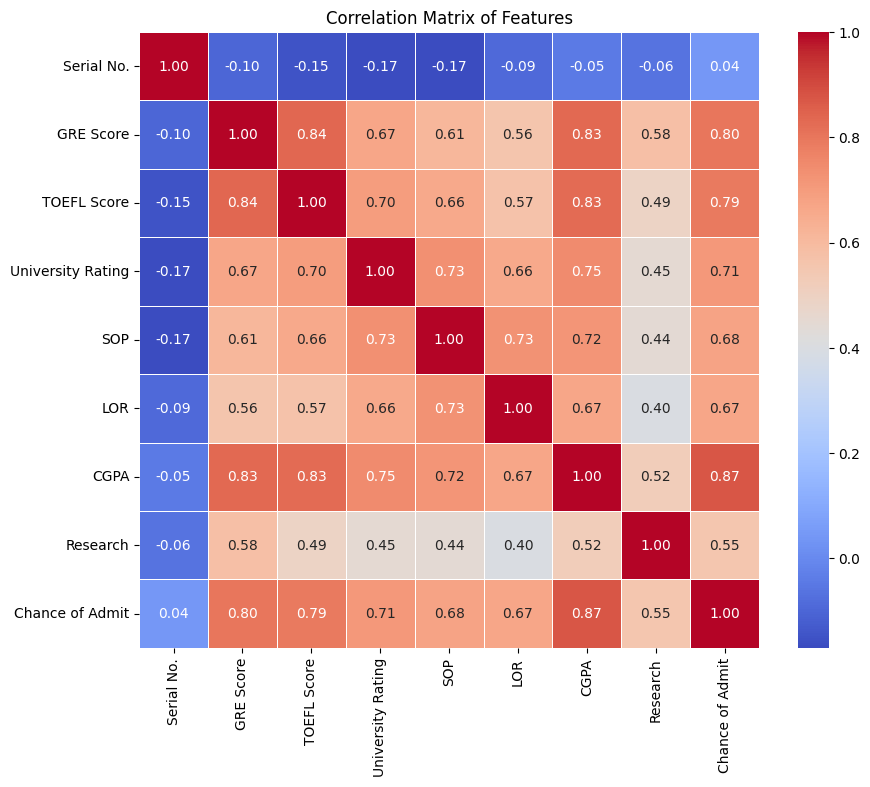

In [14]:
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Features')
plt.show()



In [15]:
target = 'Chance of Admit'
features = [col for col in df.columns if col != target]

In [16]:
X = df.drop(target, axis=1)
y = df[target]

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
results = {}

models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(random_state=42),
    'Lasso Regression': Lasso(random_state=42),
    'Decision Tree Regressor': DecisionTreeRegressor(random_state=42),
    'Random Forest Regressor': RandomForestRegressor(random_state=42, n_estimators=100),
    'Gradient Boosting Regressor': GradientBoostingRegressor(random_state=42, n_estimators=100),
    'Support Vector Regressor': SVR()
}

In [19]:
# Evaluate all models
for name, model in models.items():
    print(f"\nTraining {name}...")

    # Use StandardScaler in a Pipeline for linear/distance-based models
    if name in ['Linear Regression', 'Ridge Regression', 'Lasso Regression', 'Support Vector Regressor']:
        pipeline = Pipeline([
            ('scaler', StandardScaler()),
            ('model', model)
        ])
    else:
        # Tree-based models (RF, DT, GB) are generally not sensitive to scaling
        pipeline = Pipeline([
            ('model', model)
        ])

    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    # Evaluation Metrics (Regression)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    results[name] = {'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'R2 Score': r2}
    print(f"  R2 Score: {r2:.4f}, RMSE: {rmse:.4f}")


Training Linear Regression...
  R2 Score: 0.8212, RMSE: 0.0679

Training Ridge Regression...
  R2 Score: 0.8210, RMSE: 0.0680

Training Lasso Regression...
  R2 Score: -0.0008, RMSE: 0.1608

Training Decision Tree Regressor...
  R2 Score: 0.8014, RMSE: 0.0716

Training Random Forest Regressor...
  R2 Score: 0.8544, RMSE: 0.0613

Training Gradient Boosting Regressor...
  R2 Score: 0.8644, RMSE: 0.0592

Training Support Vector Regressor...
  R2 Score: 0.7851, RMSE: 0.0745


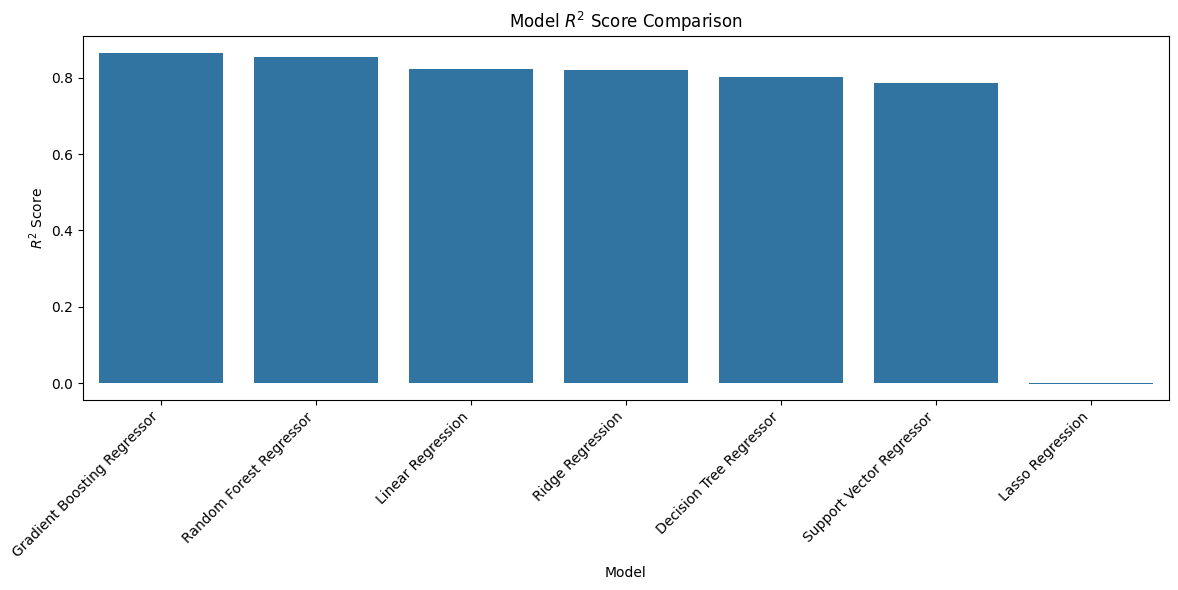

In [26]:
plt.figure(figsize=(12, 6))
sns.barplot(x=results_df.index, y='R2 Score', data=results_df)
plt.xticks(rotation=45, ha='right')
plt.title('Model $R^2$ Score Comparison')
plt.ylabel('$R^2$ Score')
plt.xlabel('Model')
plt.tight_layout()
plt.show()


In [25]:
import pickle
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# Get the best performing linear model pipeline (includes scaler)
best_linear_model_name = 'Linear Regression'
best_linear_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', models[best_linear_model_name])
])
best_linear_pipeline.fit(X_train, y_train) # Retrain t's fitted


# Get the best performing tree-based model (no scaler in pipeline)
best_tree_model_name = 'Random Forest Regressor'
best_tree_pipeline = Pipeline([
    ('model', models[best_tree_model_name])
])
best_tree_pipeline.fit(X_train, y_train)


filename_linear_pipeline = f'{best_linear_model_name.replace(" ", "_").lower()}_pipeline.pkl'
with open(filename_linear_pipeline, 'wb') as file:
    pickle.dump(best_linear_pipeline, file)
print(f"Saved {best_linear_model_name} pipeline to {filename_linear_pipeline}")

filename_tree_pipeline = f'{best_tree_model_name.replace(" ", "_").lower()}_pipeline.pkl'
with open(filename_tree_pipeline, 'wb') as file:
    pickle.dump(best_tree_pipeline, file)
print(f"Saved {best_tree_model_name} pipeline to {filename_tree_pipeline}")

Saved Linear Regression pipeline to linear_regression_pipeline.pkl
Saved Random Forest Regressor pipeline to random_forest_regressor_pipeline.pkl
